# Importing required libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

## DataFrame1 leads_basic_details ##

In [119]:
df1 = pd.read_csv("leads_basic_details.csv")
df1

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals
...,...,...,...,...,...,...,...
355,USR1356,21,MALE,Mumbai,Degree,Government Employee,user_referrals
356,USR1357,22,MALE,Chennai,Looking for Job,Government Employee,website
357,USR1358,25,MALE,Chennai,B.Tech,Government Employee,SEO
358,USR1359,18,FEMALE,Mumbai,B.Tech,Government Employee,email_marketing


In [120]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            360 non-null    object
 1   age                360 non-null    int64 
 2   gender             360 non-null    object
 3   current_city       360 non-null    object
 4   current_education  360 non-null    object
 5   parent_occupation  360 non-null    object
 6   lead_gen_source    360 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.8+ KB


In [121]:
# finding null values in dataframe
df1.isnull().sum()

lead_id              0
age                  0
gender               0
current_city         0
current_education    0
parent_occupation    0
lead_gen_source      0
dtype: int64

In [122]:
df1.duplicated().sum()

0

In [123]:
df1["age"].describe()

count    360.000000
mean      21.561111
std       11.555444
min       16.000000
25%       18.000000
50%       21.000000
75%       24.000000
max      211.000000
Name: age, dtype: float64

### Outliers analysis

<Figure size 432x288 with 0 Axes>

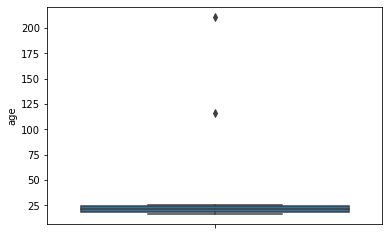

<Figure size 432x288 with 0 Axes>

In [124]:
sns.boxplot(y = df1["age"])
plt.figure()

#### Removing Outliers

<AxesSubplot:ylabel='age'>

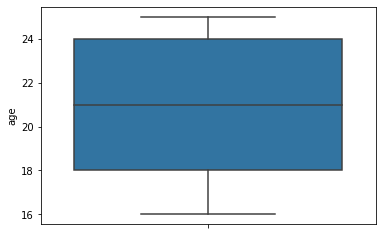

In [128]:
  percentile25=df1["age"].quantile(0.25)
  percentile75=df1["age"].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit=percentile75+(1.5*iqr)
  lower_limit=percentile25-(1.5*iqr)
  df1=df1[df1["age"]<upper_limit]
  df1=df1[df1["age"]>lower_limit]
  plt.figure()
  sns.boxplot(y="age",data=df1)

In [129]:
df1.describe()

,age
count,358.000000
mean,20.768156
std,2.852959
min,16.000000
25%,18.000000
50%,21.000000
75%,24.000000
max,25.000000


In [130]:
df1.shape

(358, 7)

In [131]:
df1

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals
...,...,...,...,...,...,...,...
355,USR1356,21,MALE,Mumbai,Degree,Government Employee,user_referrals
356,USR1357,22,MALE,Chennai,Looking for Job,Government Employee,website
357,USR1358,25,MALE,Chennai,B.Tech,Government Employee,SEO
358,USR1359,18,FEMALE,Mumbai,B.Tech,Government Employee,email_marketing


## DataFrame2 leads_demo_watched_details

In [67]:
#2.leads_demo_watched_details
df2 = pd.read_csv("leads_demo_watched_details.csv")

,lead_id,demo_watched_date,language,watched_percentage
0,USR1002,1/4/2022,Telugu,42
1,USR1003,1/7/2022,Telugu,81
2,USR1004,1/2/2022,Telugu,35
3,USR1005,1/3/2022,Hindi,38
4,USR1006,1/12/2022,Hindi,54
...,...,...,...,...
189,USR1317,2/25/2022,English,48
190,USR1318,2/25/2022,English,83
191,USR1319,2/28/2022,English,84
192,USR1343,1/25/2022,English,68


In [69]:
df2.duplicated().sum()

0

# Outliers analysis

In [70]:
df2.describe()

,watched_percentage
count,194.000000
mean,56.634021
std,43.555635
min,2.000000
25%,35.000000
50%,55.500000
75%,75.750000
max,510.000000


In [71]:
df2["watched_percentage"].unique()

array([ 42,  81,  35,  38,  54,  52,  41,  50,  48,  44,  46,  51,  47,
        40,  36, 100,   5,  53,   8,  10,  11,  14,  17,  20,  23,  55,
        73,  26,  29,  32,  56,  59,  62,  60,  65,  70,  74,  75,  68,
        85,  71,  86,  87,  88,  89,   2,  90,  91,  92,  77,  80,  63,
        83,  25,   3,   4,  30,  45,  64, 510,  37,  66,  67,  49,  57,
        69,  61,  95,  15,  12,  13,  72,  19, 233,  27,  21,  16,  76,
        18,  79,  78,  22,  24,  28,  82,  84], dtype=int64)

<Figure size 432x288 with 0 Axes>

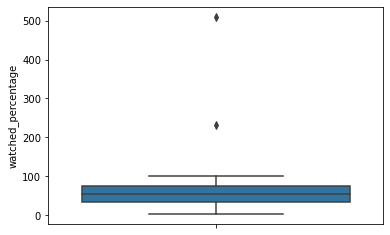

<Figure size 432x288 with 0 Axes>

In [72]:
sns.boxplot(y = df2["watched_percentage"])
plt.figure()

In [73]:
  percentile25=df2["watched_percentage"].quantile(0.25)
  percentile75=df2["watched_percentage"].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit=percentile75+(1.5*iqr)
  lower_limit=percentile25-(1.5*iqr)
  df2=df2[df2["watched_percentage"]<upper_limit]
  df2=df2[df2["watched_percentage"]>lower_limit]

<Figure size 432x288 with 0 Axes>

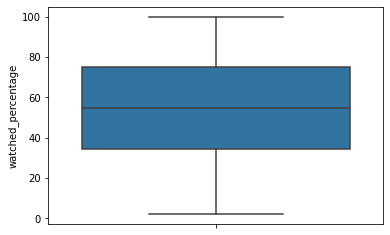

<Figure size 432x288 with 0 Axes>

In [74]:
sns.boxplot(y = df2["watched_percentage"])
plt.figure()

In [75]:
df2.describe()

,watched_percentage
count,192.000000
mean,53.354167
std,25.829477
min,2.000000
25%,34.250000
50%,55.000000
75%,75.000000
max,100.000000


In [76]:
df2 = df2.drop(["demo_watched_date"],axis = 1)
df2

,lead_id,language,watched_percentage
0,USR1002,Telugu,42
1,USR1003,Telugu,81
2,USR1004,Telugu,35
3,USR1005,Hindi,38
4,USR1006,Hindi,54
...,...,...,...
189,USR1317,English,48
190,USR1318,English,83
191,USR1319,English,84
192,USR1343,English,68


## DataFrame3 leads_interaction_details

In [88]:
#3. leads_interaction_details

df3 = pd.read_csv("leads_interaction_details.csv")
df3

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
0,JNR1001MG,USR1001,lead,1/2/2022,successful,lead_introduction
1,JNR1001MG,USR1001,lead,1/2/2022,successful,demo_schedule
2,JNR1001MG,USR1002,lead,1/3/2022,successful,lead_introduction
3,JNR1001MG,USR1002,lead,1/4/2022,successful,demo_schedule
4,JNR1001MG,USR1002,awareness,1/5/2022,successful,post_demo_followup
...,...,...,...,...,...,...
2187,JNR1001MG,USR1356,lead,2/21/2022,unsuccessful,lead_introduction
2188,JNR1001MG,USR1357,lead,1/8/2022,unsuccessful,lead_introduction
2189,JNR1001MG,USR1358,lead,1/12/2022,unsuccessful,lead_introduction
2190,JNR1001MG,USR1359,lead,1/22/2022,unsuccessful,lead_introduction


In [89]:
df3.columns

Index(['jnr_sm_id', 'lead_id', 'lead_stage', 'call_done_date', 'call_status',
       'call_reason'],
      dtype='object')

In [96]:
df3.isnull().sum()

jnr_sm_id         0
lead_id           0
lead_stage        0
call_done_date    0
call_status       0
call_reason       0
dtype: int64

In [90]:
df3.duplicated().sum()

438

In [91]:
df3 = df3.drop_duplicates()

In [92]:
df3.duplicated().sum()

0

In [94]:
col = ['lead_stage','call_status','call_reason']

for i in col:
    print("col :",i)
    print(df3[i].value_counts())
    print()

col : lead_stage
lead             1204
consideration     257
awareness         229
conversion         64
Name: lead_stage, dtype: int64

col : call_status
successful      1432
unsuccessful     322
Name: call_status, dtype: int64

col : call_reason
lead_introduction             498
demo_not_attended             360
demo_schedule                 346
post_demo_followup            194
interested_for_conversion     134
followup_for_conversion       123
successful_conversion          64
followup_for_consideration     35
Name: call_reason, dtype: int64



## DataFrame4 leads_reasons_for_no_interest ##

In [103]:
#4.leads_reasons_for_no_interest
df4 = pd.read_csv("leads_reasons_for_no_interest.csv")
df4

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert
0,USR1001,No time for student,NaN,NaN
1,USR1003,NaN,No time for student,NaN
2,USR1004,NaN,Wants offline classes,NaN
3,USR1005,NaN,Can't afford,NaN
4,USR1006,NaN,Student not interested in domain,NaN
...,...,...,...,...
289,USR1356,Cannot afford,NaN,NaN
290,USR1357,Cannot afford,NaN,NaN
291,USR1358,Wants offline classes,NaN,NaN
292,USR1359,Will join in final year,NaN,NaN


In [104]:
# filling null values with blank string #

df4 = df4.fillna('')

In [ ]:
# creating new column named "reason_for_no_intrest" and merging all columns in one.

In [105]:
df4["reason_for_no_intrest"] = df4["reasons_for_not_interested_in_demo"] + df4['reasons_for_not_interested_to_consider'] + df4["reasons_for_not_interested_to_convert"]

In [106]:
df4

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert,reason_for_no_intrest
0,USR1001,No time for student,,,No time for student
1,USR1003,,No time for student,,No time for student
2,USR1004,,Wants offline classes,,Wants offline classes
3,USR1005,,Can't afford,,Can't afford
4,USR1006,,Student not interested in domain,,Student not interested in domain
...,...,...,...,...,...
289,USR1356,Cannot afford,,,Cannot afford
290,USR1357,Cannot afford,,,Cannot afford
291,USR1358,Wants offline classes,,,Wants offline classes
292,USR1359,Will join in final year,,,Will join in final year


#### droping unnecessary columns.

In [108]:
df4 = df4.drop(["reasons_for_not_interested_in_demo","reasons_for_not_interested_to_consider","reasons_for_not_interested_to_convert"], axis = 1)

In [109]:
df4

,lead_id,reason_for_no_intrest
0,USR1001,No time for student
1,USR1003,No time for student
2,USR1004,Wants offline classes
3,USR1005,Can't afford
4,USR1006,Student not interested in domain
...,...,...
289,USR1356,Cannot afford
290,USR1357,Cannot afford
291,USR1358,Wants offline classes
292,USR1359,Will join in final year


In [110]:
df4["reason_for_no_intrest"].value_counts()

Can't afford                        95
Wants offline classes               91
Student not interested in domain    52
No time for student                 38
Will join in final year             14
Cannot afford                        4
Name: reason_for_no_intrest, dtype: int64

In [112]:
df4["reason_for_no_intrest"] = df4["reason_for_no_intrest"].replace("Can't afford","Cannot afford")

In [113]:
df4["reason_for_no_intrest"].value_counts()

Cannot afford                       99
Wants offline classes               91
Student not interested in domain    52
No time for student                 38
Will join in final year             14
Name: reason_for_no_intrest, dtype: int64

#### DataFrame5 sales_managers_assigned_leads_details 

In [116]:
#5.sales_managers_assigned_leads_details

df5 = pd.read_csv("sales_managers_assigned_leads_details.csv") 
df5

,snr_sm_id,jnr_sm_id,assigned_date,cycle,lead_id
0,SNR501MG,JNR1001MG,1/1/2022,1,USR1001
1,SNR501MG,JNR1001MG,1/1/2022,1,USR1002
2,SNR501MG,JNR1001MG,1/1/2022,1,USR1003
3,SNR501MG,JNR1001MG,1/1/2022,1,USR1004
4,SNR501MG,JNR1001MG,1/1/2022,1,USR1005
...,...,...,...,...,...
355,SNR501MG,JNR1001MG,2/19/2022,4,USR1356
356,SNR501MG,JNR1001MG,1/1/2022,1,USR1357
357,SNR501MG,JNR1001MG,1/8/2022,2,USR1358
358,SNR501MG,JNR1001MG,1/15/2022,3,USR1359


In [136]:
df5.isnull().sum()

snr_sm_id        0
jnr_sm_id        0
assigned_date    0
cycle            0
lead_id          0
dtype: int64

In [138]:
df5.duplicated().sum()

0

In [139]:
df5 = df5.drop(df5[(df5['lead_id'] == "USR1301") | (df5['lead_id'] == "USR1018") | (df5['lead_id'] == "USR1213") | (df5['lead_id'] == "USR1138")].index)


In [140]:
df5.shape

(356, 5)

In [142]:
df6 = pd.merge(df1,df3)
df6

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source,jnr_sm_id,lead_stage,call_done_date,call_status,call_reason
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media,JNR1001MG,lead,1/2/2022,successful,lead_introduction
1,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media,JNR1001MG,lead,1/2/2022,successful,demo_schedule
2,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,lead,1/3/2022,successful,lead_introduction
3,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,lead,1/4/2022,successful,demo_schedule
4,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,awareness,1/5/2022,successful,post_demo_followup
...,...,...,...,...,...,...,...,...,...,...,...,...
1740,USR1356,21,MALE,Mumbai,Degree,Government Employee,user_referrals,JNR1001MG,lead,2/21/2022,unsuccessful,lead_introduction
1741,USR1357,22,MALE,Chennai,Looking for Job,Government Employee,website,JNR1001MG,lead,1/8/2022,unsuccessful,lead_introduction
1742,USR1358,25,MALE,Chennai,B.Tech,Government Employee,SEO,JNR1001MG,lead,1/12/2022,unsuccessful,lead_introduction
1743,USR1359,18,FEMALE,Mumbai,B.Tech,Government Employee,email_marketing,JNR1001MG,lead,1/22/2022,unsuccessful,lead_introduction


In [144]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1745 entries, 0 to 1744
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            1745 non-null   object
 1   age                1745 non-null   int64 
 2   gender             1745 non-null   object
 3   current_city       1745 non-null   object
 4   current_education  1745 non-null   object
 5   parent_occupation  1745 non-null   object
 6   lead_gen_source    1745 non-null   object
 7   jnr_sm_id          1745 non-null   object
 8   lead_stage         1745 non-null   object
 9   call_done_date     1745 non-null   object
 10  call_status        1745 non-null   object
 11  call_reason        1745 non-null   object
dtypes: int64(1), object(11)
memory usage: 177.2+ KB


In [146]:
df7 = pd.merge(df6,df5)
df7

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source,jnr_sm_id,lead_stage,call_done_date,call_status,call_reason,snr_sm_id,assigned_date,cycle
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media,JNR1001MG,lead,1/2/2022,successful,lead_introduction,SNR501MG,1/1/2022,1
1,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media,JNR1001MG,lead,1/2/2022,successful,demo_schedule,SNR501MG,1/1/2022,1
2,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,lead,1/3/2022,successful,lead_introduction,SNR501MG,1/1/2022,1
3,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,lead,1/4/2022,successful,demo_schedule,SNR501MG,1/1/2022,1
4,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,awareness,1/5/2022,successful,post_demo_followup,SNR501MG,1/1/2022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,USR1356,21,MALE,Mumbai,Degree,Government Employee,user_referrals,JNR1001MG,lead,2/21/2022,unsuccessful,lead_introduction,SNR501MG,2/19/2022,4
1726,USR1357,22,MALE,Chennai,Looking for Job,Government Employee,website,JNR1001MG,lead,1/8/2022,unsuccessful,lead_introduction,SNR501MG,1/1/2022,1
1727,USR1358,25,MALE,Chennai,B.Tech,Government Employee,SEO,JNR1001MG,lead,1/12/2022,unsuccessful,lead_introduction,SNR501MG,1/8/2022,2
1728,USR1359,18,FEMALE,Mumbai,B.Tech,Government Employee,email_marketing,JNR1001MG,lead,1/22/2022,unsuccessful,lead_introduction,SNR501MG,1/15/2022,3


In [147]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            1730 non-null   object
 1   age                1730 non-null   int64 
 2   gender             1730 non-null   object
 3   current_city       1730 non-null   object
 4   current_education  1730 non-null   object
 5   parent_occupation  1730 non-null   object
 6   lead_gen_source    1730 non-null   object
 7   jnr_sm_id          1730 non-null   object
 8   lead_stage         1730 non-null   object
 9   call_done_date     1730 non-null   object
 10  call_status        1730 non-null   object
 11  call_reason        1730 non-null   object
 12  snr_sm_id          1730 non-null   object
 13  assigned_date      1730 non-null   object
 14  cycle              1730 non-null   int64 
dtypes: int64(2), object(13)
memory usage: 216.2+ KB


In [159]:
df8 = pd.merge(df7, df4, how='left',on='lead_id')
df8

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source,jnr_sm_id,lead_stage,call_done_date,call_status,call_reason,snr_sm_id,assigned_date,cycle,reason_for_no_intrest
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media,JNR1001MG,lead,1/2/2022,successful,lead_introduction,SNR501MG,1/1/2022,1,No time for student
1,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media,JNR1001MG,lead,1/2/2022,successful,demo_schedule,SNR501MG,1/1/2022,1,No time for student
2,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,lead,1/3/2022,successful,lead_introduction,SNR501MG,1/1/2022,1,NaN
3,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,lead,1/4/2022,successful,demo_schedule,SNR501MG,1/1/2022,1,NaN
4,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,awareness,1/5/2022,successful,post_demo_followup,SNR501MG,1/1/2022,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,USR1356,21,MALE,Mumbai,Degree,Government Employee,user_referrals,JNR1001MG,lead,2/21/2022,unsuccessful,lead_introduction,SNR501MG,2/19/2022,4,Cannot afford
1726,USR1357,22,MALE,Chennai,Looking for Job,Government Employee,website,JNR1001MG,lead,1/8/2022,unsuccessful,lead_introduction,SNR501MG,1/1/2022,1,Cannot afford
1727,USR1358,25,MALE,Chennai,B.Tech,Government Employee,SEO,JNR1001MG,lead,1/12/2022,unsuccessful,lead_introduction,SNR501MG,1/8/2022,2,Wants offline classes
1728,USR1359,18,FEMALE,Mumbai,B.Tech,Government Employee,email_marketing,JNR1001MG,lead,1/22/2022,unsuccessful,lead_introduction,SNR501MG,1/15/2022,3,Will join in final year


In [160]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1730 entries, 0 to 1729
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   lead_id                1730 non-null   object
 1   age                    1730 non-null   int64 
 2   gender                 1730 non-null   object
 3   current_city           1730 non-null   object
 4   current_education      1730 non-null   object
 5   parent_occupation      1730 non-null   object
 6   lead_gen_source        1730 non-null   object
 7   jnr_sm_id              1730 non-null   object
 8   lead_stage             1730 non-null   object
 9   call_done_date         1730 non-null   object
 10  call_status            1730 non-null   object
 11  call_reason            1730 non-null   object
 12  snr_sm_id              1730 non-null   object
 13  assigned_date          1730 non-null   object
 14  cycle                  1730 non-null   int64 
 15  reason_for_no_intrest

In [162]:
df8["reason_for_no_intrest"].fillna("Shown Interest",inplace = True)

In [163]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1730 entries, 0 to 1729
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   lead_id                1730 non-null   object
 1   age                    1730 non-null   int64 
 2   gender                 1730 non-null   object
 3   current_city           1730 non-null   object
 4   current_education      1730 non-null   object
 5   parent_occupation      1730 non-null   object
 6   lead_gen_source        1730 non-null   object
 7   jnr_sm_id              1730 non-null   object
 8   lead_stage             1730 non-null   object
 9   call_done_date         1730 non-null   object
 10  call_status            1730 non-null   object
 11  call_reason            1730 non-null   object
 12  snr_sm_id              1730 non-null   object
 13  assigned_date          1730 non-null   object
 14  cycle                  1730 non-null   int64 
 15  reason_for_no_intrest

In [ ]:
L4 = pd.merge(L3,df2,how='left',on='lead_id')
L4.info()

In [165]:
df9 = pd.merge(df8,df2,how = "left", on = "lead_id")
df9

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source,jnr_sm_id,lead_stage,call_done_date,call_status,call_reason,snr_sm_id,assigned_date,cycle,reason_for_no_intrest,language,watched_percentage
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media,JNR1001MG,lead,1/2/2022,successful,lead_introduction,SNR501MG,1/1/2022,1,No time for student,NaN,NaN
1,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media,JNR1001MG,lead,1/2/2022,successful,demo_schedule,SNR501MG,1/1/2022,1,No time for student,NaN,NaN
2,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,lead,1/3/2022,successful,lead_introduction,SNR501MG,1/1/2022,1,Shown Interest,Telugu,42.0
3,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,lead,1/4/2022,successful,demo_schedule,SNR501MG,1/1/2022,1,Shown Interest,Telugu,42.0
4,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,awareness,1/5/2022,successful,post_demo_followup,SNR501MG,1/1/2022,1,Shown Interest,Telugu,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,USR1356,21,MALE,Mumbai,Degree,Government Employee,user_referrals,JNR1001MG,lead,2/21/2022,unsuccessful,lead_introduction,SNR501MG,2/19/2022,4,Cannot afford,NaN,NaN
1726,USR1357,22,MALE,Chennai,Looking for Job,Government Employee,website,JNR1001MG,lead,1/8/2022,unsuccessful,lead_introduction,SNR501MG,1/1/2022,1,Cannot afford,NaN,NaN
1727,USR1358,25,MALE,Chennai,B.Tech,Government Employee,SEO,JNR1001MG,lead,1/12/2022,unsuccessful,lead_introduction,SNR501MG,1/8/2022,2,Wants offline classes,NaN,NaN
1728,USR1359,18,FEMALE,Mumbai,B.Tech,Government Employee,email_marketing,JNR1001MG,lead,1/22/2022,unsuccessful,lead_introduction,SNR501MG,1/15/2022,3,Will join in final year,NaN,NaN


In [166]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1730 entries, 0 to 1729
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lead_id                1730 non-null   object 
 1   age                    1730 non-null   int64  
 2   gender                 1730 non-null   object 
 3   current_city           1730 non-null   object 
 4   current_education      1730 non-null   object 
 5   parent_occupation      1730 non-null   object 
 6   lead_gen_source        1730 non-null   object 
 7   jnr_sm_id              1730 non-null   object 
 8   lead_stage             1730 non-null   object 
 9   call_done_date         1730 non-null   object 
 10  call_status            1730 non-null   object 
 11  call_reason            1730 non-null   object 
 12  snr_sm_id              1730 non-null   object 
 13  assigned_date          1730 non-null   object 
 14  cycle                  1730 non-null   int64  
 15  reas

In [168]:
df9["language"].unique()

array([nan, 'Telugu', 'Hindi', 'English'], dtype=object)

In [169]:
df9["language"].fillna("not available",inplace = True)

In [170]:
df9["language"].unique()

array(['not available', 'Telugu', 'Hindi', 'English'], dtype=object)

In [175]:
df9["watched_percentage"] = df9["watched_percentage"].fillna(0)
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1730 entries, 0 to 1729
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lead_id                1730 non-null   object 
 1   age                    1730 non-null   int64  
 2   gender                 1730 non-null   object 
 3   current_city           1730 non-null   object 
 4   current_education      1730 non-null   object 
 5   parent_occupation      1730 non-null   object 
 6   lead_gen_source        1730 non-null   object 
 7   jnr_sm_id              1730 non-null   object 
 8   lead_stage             1730 non-null   object 
 9   call_done_date         1730 non-null   object 
 10  call_status            1730 non-null   object 
 11  call_reason            1730 non-null   object 
 12  snr_sm_id              1730 non-null   object 
 13  assigned_date          1730 non-null   object 
 14  cycle                  1730 non-null   int64  
 15  reas

In [176]:
df9["lead_stage"].unique()

array(['lead', 'awareness', 'consideration', 'conversion'], dtype=object)

In [178]:
df9["lead_status"] = np.where(df9['lead_stage'] == "conversion", "converted", "yet to convert")

In [179]:
df9

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source,jnr_sm_id,lead_stage,call_done_date,call_status,call_reason,snr_sm_id,assigned_date,cycle,reason_for_no_intrest,language,watched_percentage,lead_status
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media,JNR1001MG,lead,1/2/2022,successful,lead_introduction,SNR501MG,1/1/2022,1,No time for student,not available,0.0,yet to convert
1,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media,JNR1001MG,lead,1/2/2022,successful,demo_schedule,SNR501MG,1/1/2022,1,No time for student,not available,0.0,yet to convert
2,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,lead,1/3/2022,successful,lead_introduction,SNR501MG,1/1/2022,1,Shown Interest,Telugu,42.0,yet to convert
3,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,lead,1/4/2022,successful,demo_schedule,SNR501MG,1/1/2022,1,Shown Interest,Telugu,42.0,yet to convert
4,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,awareness,1/5/2022,successful,post_demo_followup,SNR501MG,1/1/2022,1,Shown Interest,Telugu,42.0,yet to convert
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,USR1356,21,MALE,Mumbai,Degree,Government Employee,user_referrals,JNR1001MG,lead,2/21/2022,unsuccessful,lead_introduction,SNR501MG,2/19/2022,4,Cannot afford,not available,0.0,yet to convert
1726,USR1357,22,MALE,Chennai,Looking for Job,Government Employee,website,JNR1001MG,lead,1/8/2022,unsuccessful,lead_introduction,SNR501MG,1/1/2022,1,Cannot afford,not available,0.0,yet to convert
1727,USR1358,25,MALE,Chennai,B.Tech,Government Employee,SEO,JNR1001MG,lead,1/12/2022,unsuccessful,lead_introduction,SNR501MG,1/8/2022,2,Wants offline classes,not available,0.0,yet to convert
1728,USR1359,18,FEMALE,Mumbai,B.Tech,Government Employee,email_marketing,JNR1001MG,lead,1/22/2022,unsuccessful,lead_introduction,SNR501MG,1/15/2022,3,Will join in final year,not available,0.0,yet to convert


In [185]:
df9.duplicated().sum()

0

In [190]:
df9.shape

(1730, 19)

In [186]:
df9.to_csv("Edtech.csv",index = False)